## Demo 1 - Parametrizing a Trefoil Knot

In [8]:
import numpy as np

#topological data analysis
from dreimac import CircularCoords 
from persim import plot_diagrams

#plotting and visualization
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Setup trefoil knot data
np.random.seed(0)
n_data = 5000
u = 4*np.pi*np.random.rand(n_data)
v = 2*np.pi*np.random.rand(n_data)
data = np.zeros((n_data, 3))
data[:, 0] = np.cos(u)*np.cos(v) + 6*np.cos(u)*(1.5+np.sin(1.5*u)/2)
data[:, 1] = np.sin(u)*np.cos(v) + 6*np.sin(u)*(1.5+np.sin(1.5*u)/2)
data[:, 2] = np.sin(v) + 4*np.cos(1.5*u)
data += 0.2*np.random.randn(*data.shape)

# Plot the data 
fig = go.Figure(data=[go.Scatter3d(
    x=data[:,0], y=data[:,1], z=data[:,2], 
    mode ='markers', 
    marker=dict(size = 2 , color = 'grey'))])

fig.update_layout(scene=dict(aspectmode='data'))
fig.show()

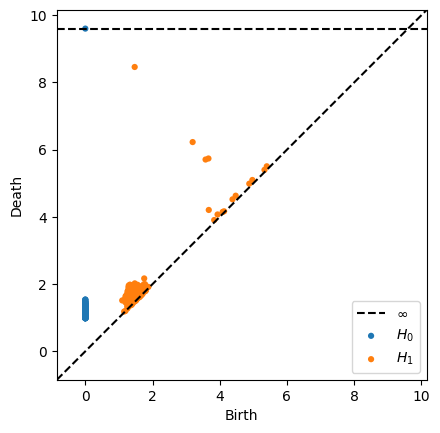

In [10]:
n_lands = 500

cc = CircularCoords(data, n_landmarks=n_lands)

plot_diagrams(cc.dgms_)

In [11]:
# Get the circular coordinate at birth, and for the cocycle with highest persistence

theta = cc.get_coordinates(perc= 0, cocycle_idx = 0, standard_range = True)

In [5]:
# Plot the trefoil knot with points colored by the computed circular coordinate
fig = go.Figure(data=[go.Scatter3d(
    x=data.T[0], y=data.T[1], z=data.T[2], 
    mode ='markers', 
    marker=dict(size = 2 , color = theta, colorscale = 'plasma',
                colorbar=dict( title='Circular Coordinate',
                titleside='right',
                titlefont=dict(size=14),
                len=1,
                y=0.5))
)])

fig.update_layout( scene=dict(aspectmode='data'))
fig.show()

In [6]:
from dreimac import CircleMapUtils

fig = go.Figure(data=[go.Scatter3d(
    x=data.T[0], y=data.T[1], z=data.T[2], 
    mode ='markers', 
    marker=dict(size = 2 , color =  CircleMapUtils.to_sinebow(theta))
)])

fig.update_layout( scene=dict(aspectmode='data'))
fig.show()